# Import Libraries

In [1]:
# For Preparing Data
import os
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
import random
import copy


# For Splitting Training & Validating data
from sklearn.model_selection import train_test_split
from tensorflow.keras import  layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, BatchNormalization, Concatenate, Conv2D, Dropout,ZeroPadding2D,Concatenate, Input, Lambda, MaxPooling2D,Flatten, add
from tensorflow.keras import backend as K

# Define Constants

In [2]:
TRAIN_IMG_DIR = "/kaggle/input/machathon-3/train_images/"
TEST_IMG_DIR = "/kaggle/input/machathon-3/test_images/"
TRAIN_CSV_PATH = "/kaggle/input/machathon-3/train_labels.csv"

IMAGE_WIDTH = 256
IMAGE_HEIGHT = 64
IMAGE_CHANNELS = 3

# 1. Prepare Training Data

first load the csv file into a dataframe

In [3]:
df = pd.read_csv(TRAIN_CSV_PATH)
labels = df['label']
labels_list = []

chars = ['ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك',
       'ل', 'م', 'ن','ه','و','ى', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

for i, l in enumerate(labels):
    labels_list.append(l.split(" "))
    
    if '\u200d' in labels_list[i]:
        labels_list[i].remove('\u200d')

# print(labels_list[2322])
# char_labels = labels_list
# df['label'] = copy.deepcopy(labels_list) 

for i1, l in enumerate(labels_list):
    for i2, c in enumerate(l):
        current_vec = [0] * len(chars)
        if c in chars:
            index = chars.index(c)
            current_vec[index] = 1
            labels_list[i1][i2] = current_vec
        else:
            print("error")
        
df['en'] = labels_list

# new df from the column of lists
split_df = pd.DataFrame(df['en'].tolist(), columns=['en0', 'en1', 'en2','en3', 'en4', 'en5', 'en6'])

# concat df and split_df
df = pd.concat([df, split_df], axis=1)
    
df.drop('label',axis='columns', inplace=True)
df.drop('en',axis='columns', inplace=True)

empty_list = ["E"] * len(chars)

for column in df:
    for i, e in enumerate(df[column]):
        if e is None:
            df[column][i] = empty_list

# print(df['label'][2322])
# print(df['label'][4951])
# print(df['label'][5278])
df.head()

,img_name,en0,en1,en2,en3,en4,en5,en6
0,00000.jpg,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ..."
1,00001.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ..."
2,00002.jpg,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ..."
3,00003.jpg,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ..."
4,00004.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, ..."


Have a look of a sample image from the train data

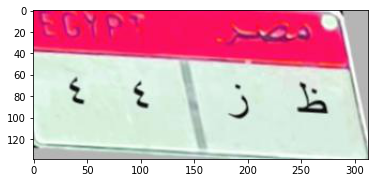

In [4]:
img_path = os.path.join(TRAIN_IMG_DIR, random.choice(df['img_name']))
img = load_img(img_path)
plt.imshow(img)

**1.1 Split Training & Validating Data**

Split the input data into training(80%) & validation(20%)

In [5]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

print("Shape of total dataframe: ", df.shape)
print("Shape of train dataframe: ", train_df.shape)
print("Shape of train dataframe: ", validate_df.shape)

Shape of total dataframe:  (5279, 8)
Shape of train dataframe:  (4223, 8)
Shape of train dataframe:  (1056, 8)


Now save new dataframes prop into variables for later use

In [6]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

**1.2 Data Augmentation**

1.2.1 Train Generator

In [7]:
train_datagen = ImageDataGenerator(
#     rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.4,1.2]
#     width_shift_range=0.05,
#     height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    TRAIN_IMG_DIR,
    x_col='img_name',
    y_col=["en0", "en1", "en2","en3", "en4", "en5", "en6"],
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode='raw',
    batch_size=batch_size
)

Found 4223 validated image filenames.


1.2.2 Validation Generator

In [8]:
validate_datagen = ImageDataGenerator(rescale=1./255)

validate_generator = validate_datagen.flow_from_dataframe(
    validate_df,
    TRAIN_IMG_DIR,
    x_col='img_name',
    y_col=["en0", "en1", "en2","en3", "en4", "en5", "en6"],
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode='raw',
    batch_size=batch_size
)

Found 1056 validated image filenames.


Now let's try train generator

In [9]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    TRAIN_IMG_DIR,
    x_col='img_name',
    y_col=["en0", "en1", "en2","en3", "en4", "en5", "en6"],
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode='raw',
)

Found 1 validated image filenames.


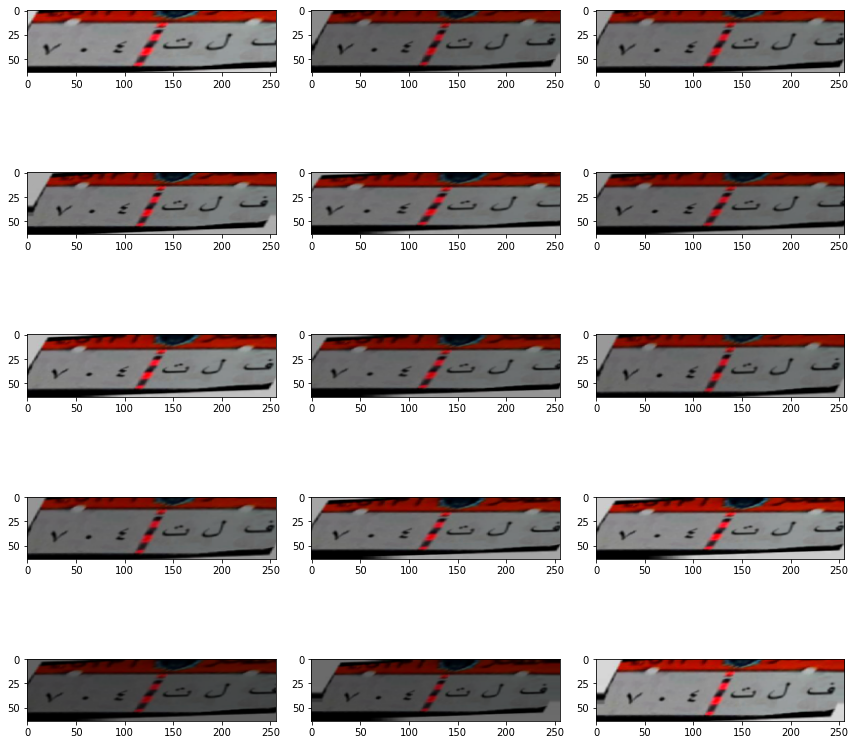

In [10]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# 2. Build Model

In [11]:
#build model
#input
inputs = Input(shape=(64, 256, 3))
#s-conv-1
x = Conv2D(16, 4,strides=2, padding='valid', use_bias=False, name= 's-conv-1_4x4') (inputs)
#x= ZeroPadding2D(padding=1)(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-conv-1_4x4_BatchNorm')(x)
x = Activation('relu', name='s-conv-1_4x4_Activation')(x)
# 4x block s-stage_1
#block1
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_1_3x3_BatchNorm1')(x)
x = Conv2D(93, 3, padding='same', use_bias=False, name= 's-stage-1_1_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_1_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-1_1_3x3_Activation')(x)
x = Conv2D(93, 3, padding='same', use_bias=False, name= 's-stage-1_1_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_1_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-1_1_3x3_Dropout')(x)
#block2
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_2_3x3_BatchNorm1')(x)
x = Conv2D(93, 3, padding='same', use_bias=False, name= 's-stage-1_2_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_2_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-1_2_3x3_Activation')(x)
x = Conv2D(93, 3, padding='same', use_bias=False, name= 's-stage-1_2_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_2_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-1_2_3x3_Dropout')(x)
#block3
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_3_3x3_BatchNorm1')(x)
x = Conv2D(93, 3, padding='same', use_bias=False, name= 's-stage-1_3_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_3_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-1_3_3x3_Activation')(x)
x = Conv2D(93, 3, padding='same', use_bias=False, name= 's-stage-1_3_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_3_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-1_3_3x3_Dropout')(x)
#block4
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_4_3x3_BatchNorm1')(x)
x = Conv2D(93, 3, padding='same', use_bias=False, name= 's-stage-1_4_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_4_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-1_4_3x3_Activation')(x)
x = Conv2D(93, 3, padding='same', use_bias=False, name= 's-stage-1_4_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-1_4_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-1_4_3x3_Dropout')(x)

# 4x block s-stage_2
#block1
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_1_3x3_BatchNorm1')(x)
x = Conv2D(176, 3, padding='same', use_bias=False, name= 's-stage-2_1_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_1_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-2_1_3x3_Activation')(x)
x = Conv2D(176, 3, padding='same', use_bias=False, name= 's-stage-2_1_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_1_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-2_1_3x3_Dropout')(x)
#block2
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_2_3x3_BatchNorm1')(x)
x = Conv2D(176, 3, padding='same', use_bias=False, name= 's-stage-2_2_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_2_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-2_2_3x3_Activation')(x)
x = Conv2D(176, 3, padding='same', use_bias=False, name= 's-stage-2_2_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_2_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-2_2_3x3_Dropout')(x)
#block3
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_3_3x3_BatchNorm1')(x)
x = Conv2D(176, 3, padding='same', use_bias=False, name= 's-stage-2_3_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_3_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-2_3_3x3_Activation')(x)
x = Conv2D(176, 3, padding='same', use_bias=False, name= 's-stage-2_3_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_3_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-2_3_3x3_Dropout')(x)
#block4
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_4_3x3_BatchNorm1')(x)
x = Conv2D(176, 3, padding='same', use_bias=False, name= 's-stage-2_4_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_4_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-2_4_3x3_Activation')(x)
x = Conv2D(176, 3, padding='valid',strides=2, use_bias=False, name= 's-stage-2_4_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-2_4_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-2_4_3x3_Dropout')(x)

# 4x block s-stage_3
#block1
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_1_3x3_BatchNorm1')(x)
x = Conv2D(256, 3, padding='same', use_bias=False, name= 's-stage-3_1_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_1_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-3_1_3x3_Activation')(x)
x = Conv2D(256, 3, padding='same', use_bias=False, name= 's-stage-3_1_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_1_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-3_1_3x3_Dropout')(x)
#block2
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_2_3x3_BatchNorm1')(x)
x = Conv2D(256, 3, padding='same', use_bias=False, name= 's-stage-3_2_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_2_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-3_2_3x3_Activation')(x)
x = Conv2D(256, 3, padding='same', use_bias=False, name= 's-stage-3_2_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_2_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-3_2_3x3_Dropout')(x)
#block3
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_3_3x3_BatchNorm1')(x)
x = Conv2D(256, 3, padding='same', use_bias=False, name= 's-stage-3_3_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_3_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-3_3_3x3_Activation')(x)
x = Conv2D(256, 3, padding='same', use_bias=False, name= 's-stage-3_3_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_3_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-3_3_3x3_Dropout')(x)
#block4
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_4_3x3_BatchNorm1')(x)
x = Conv2D(256, 3, padding='same', use_bias=False, name= 's-stage-3_4_3x3-1')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_4_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-stage-3_4_3x3_Activation')(x)
x = Conv2D(256, 3, padding='valid',strides=2, use_bias=False, name= 's-stage-3_4_3x3-2')(x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-stage-3_4_3x3_BatchNorm3')(x)
x = Dropout(.2,name='s-stage-3_4_3x3_Dropout')(x)


#s-conv-2
x = Conv2D(256, 3, padding='same', use_bias=False, name= 's-conv-2_3x3') (x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-conv-2_3x3_BatchNorm1')(x)
x = Activation('relu', name='s-conv-2_3x3_Activation1')(x)
x = Conv2D(256,(7,1), strides=1, padding='valid', use_bias=False, name= 's-conv-2_8x1') (x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='s-conv-2_3x3_BatchNorm2')(x)
x = Activation('relu', name='s-conv-2_3x3_Activation2')(x)

#2x block s-stage-4
#block1
#res-net 
#block1
buffer=x
x=Conv2D(256, (1,3), padding='same', use_bias=False, name= 'block1.1-s-stage-4-Conv2D1') (x)
x = Activation('relu', name='block1.1-s-stage-4-Activation')(x)
x=Conv2D(256, (1,3), padding='same', use_bias=False, name= 'block1.1-s-stage-4-Conv2D2') (x)
branches = [buffer,x]
x = Concatenate(axis=3, name='Res-block1.1')(branches)
#block2
buffer=x
x=Conv2D(256, (1,3), padding='same', use_bias=False, name= 'block1.2-s-stage-4-Conv2D1') (x)
x = Activation('relu', name='block1.2-s-stage-4-Activation')(x)
x=Conv2D(256, (1,3), padding='same', use_bias=False, name= 'block1.2-s-stage-4-Conv2D2') (x)
branches = [buffer,x]
x = Concatenate(axis=3, name='Res-block1.2')(branches)

x=Conv2D(256, (1,3), padding='same', use_bias=False, name= 'block1-s-stage-4-Conv2D') (x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='block1-s-stage-4-BatchNorm2')(x)
x = Activation('relu', name='block1-s-stage-4-Activation')(x)

#block2
#res-net 
#block1
buffer=x
x=Conv2D(256, (1,3), padding='same', use_bias=False, name= 'block2.1-s-stage-4-Conv2D1') (x)
x = Activation('relu', name='block2.1-s-stage-4-Activation')(x)
x=Conv2D(256, (1,3), padding='same', use_bias=False, name= 'block2.1-s-stage-4-Conv2D2') (x)
branches = [buffer,x]
x = Concatenate(axis=3, name='Res-block2.1')(branches)
#block2
buffer=x
x=Conv2D(256, (1,3), padding='same', use_bias=False, name= 'block2.2-s-stage-4-Conv2D1') (x)
x = Activation('relu', name='block2.2-s-stage-4-Activation')(x)
x=Conv2D(256, (1,3), padding='same', use_bias=False, name= 'block2.2-s-stage-4-Conv2D2') (x)
branches = [buffer,x]
x = Concatenate(axis=3, name='Res-block2.2')(branches)

x=Conv2D(256, (1,3), padding='same', use_bias=False, name= 'block2-s-stage-4-Conv2D') (x)
x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='block2-s-stage-4-BatchNorm2')(x)
x = Activation('relu', name='block2-s-stage-4-Activation')(x)


x=Conv2D(38, (1,1),strides =(1,5) ,padding='valid', use_bias=False, name= 'Conv2D') (x)
x = Activation('softmax', name='softmax')(x)
x=Flatten()(x)

model = Model(inputs, x, name='SCR_Net_model')
model.summary()


2022-03-24 19:38:10.166201: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "SCR_Net_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 256, 3)] 0                                            
__________________________________________________________________________________________________
s-conv-1_4x4 (Conv2D)           (None, 31, 127, 16)  768         input_1[0][0]                    
__________________________________________________________________________________________________
s-conv-1_4x4_BatchNorm (BatchNo (None, 31, 127, 16)  48          s-conv-1_4x4[0][0]               
__________________________________________________________________________________________________
s-conv-1_4x4_Activation (Activa (None, 31, 127, 16)  0           s-conv-1_4x4_BatchNorm[0][0]     
______________________________________________________________________________________

# 3. Train Model

**3.1 Save Model Weights**

# 4. Virtualize Training

# 5. Prepare Testing Data

# 6. Test The Model

# 7. Virtualize Result